In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
df = pd.read_csv('tour_package.csv')

In [5]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [7]:
df['Gender'][df['Gender']=='Fe Male'] = 'Female'

In [8]:
df['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [9]:
avg_age_f = df['Age'][df['Gender']=='Female'].mean(skipna=True)
avg_age_m = df['Age'][df['Gender']=='Male'].mean(skipna=True)

In [10]:
def missing_age_treatment(x):
    if pd.isnull(x['Age']):
        if x['Gender']=='Male':
            return avg_age_m
        elif x['Gender']=='Female':
            return avg_age_f
    return x['Age']

In [11]:
df['Age'] = df[['Age','Gender']].apply(missing_age_treatment, axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4888 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [13]:
pd.concat([df, df['TypeofContact'].str.get_dummies()], axis=1)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Company Invited,Self Enquiry
0,200000,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,...,Single,1.0,1,2,1,0.0,Manager,20993.0,0,1
1,200001,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,...,Divorced,2.0,0,3,1,2.0,Manager,20130.0,1,0
2,200002,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,...,Single,7.0,1,3,0,0.0,Executive,17090.0,0,1
3,200003,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,...,Divorced,2.0,1,5,1,1.0,Executive,17909.0,1,0
4,200004,0,37.319986,Self Enquiry,1,8.0,Small Business,Male,2,3.0,...,Divorced,1.0,0,5,1,0.0,Executive,18468.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.000000,Self Enquiry,3,9.0,Small Business,Male,3,5.0,...,Unmarried,2.0,1,1,1,1.0,Manager,26576.0,0,1
4884,204884,1,28.000000,Company Invited,1,31.0,Salaried,Male,4,5.0,...,Single,3.0,1,3,1,2.0,Executive,21212.0,1,0
4885,204885,1,52.000000,Self Enquiry,3,17.0,Salaried,Female,4,4.0,...,Married,7.0,0,1,1,3.0,Senior Manager,31820.0,0,1
4886,204886,1,19.000000,Self Enquiry,3,16.0,Small Business,Male,3,4.0,...,Single,3.0,0,5,0,2.0,Executive,20289.0,0,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4888 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [15]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [16]:
df['DurationOfPitch'].nunique()

34

<AxesSubplot:xlabel='ProdTaken', ylabel='DurationOfPitch'>

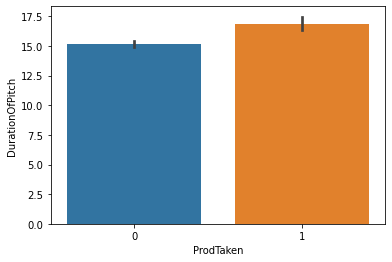

In [17]:
sns.barplot(x=df['ProdTaken'], y=df['DurationOfPitch'])

In [18]:
avg_pitch_t_0 = df['DurationOfPitch'][df['ProdTaken']==0].mean(skipna=True)
avg_pitch_t_1 = df['DurationOfPitch'][df['ProdTaken']==1].mean(skipna=True)

In [19]:
avg_pitch_t_0

15.169324827219564

In [20]:
def missing_pitch_dur_treatment(x):
    if pd.isnull(x['DurationOfPitch']):
        if x['ProdTaken']==0:
            return avg_pitch_t_0
        elif x['ProdTaken']==1:
            return avg_pitch_t_1
    return x['DurationOfPitch']

In [21]:
df['DurationOfPitch'] = df[['DurationOfPitch','ProdTaken']].apply(missing_pitch_dur_treatment, axis=1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4888 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4888 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [23]:
df.PreferredPropertyStar.value_counts()

3.0    2993
5.0     956
4.0     913
Name: PreferredPropertyStar, dtype: int64

<AxesSubplot:xlabel='PreferredPropertyStar', ylabel='MonthlyIncome'>

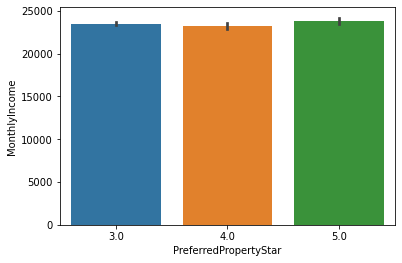

In [24]:
sns.barplot(x=df['PreferredPropertyStar'],y=df['MonthlyIncome'])
#non dependent on income

In [25]:
for i in ['Salaried', 'Free Lancer', 'Small Business', 'Large Business']:
    print(df['PreferredPropertyStar'][df['Occupation']==i].mean(skipna=True))

3.55187074829932
3.0
3.611271676300578
3.5972222222222223


In [26]:
list1 = []
for i in ['Salaried', 'Free Lancer', 'Small Business', 'Large Business']:
    mean = df['PreferredPropertyStar'][df['Occupation']==i].mean(skipna=True)
    list1.append(round(mean,0))

In [27]:
list1

[4.0, 3.0, 4.0, 4.0]

In [28]:
def missing_Pref_prop_star_treatment(x):
    if pd.isnull(x['PreferredPropertyStar']):
        if x['Occupation']=='Salaried':
            return 4.0
        elif x['Occupation']=='Free Lancer':
            return 3.0
        elif x['Occupation']=='Small Business':
            return 4.0
        elif x['Occupation']=='Large Business':
            return 4.0
    return x['PreferredPropertyStar']

In [29]:
df['PreferredPropertyStar'] = df[['PreferredPropertyStar','Occupation']].apply(missing_Pref_prop_star_treatment, axis=1)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4888 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4888 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4888 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [31]:
df['NumberOfTrips'].groupby(by=df['MaritalStatus']).describe()

,count,mean,std,min,25%,50%,75%,max
MaritalStatus,,,,,,,,
Divorced,915.0,3.234973,1.774016,1.0,2.0,3.0,4.0,8.0
Married,2262.0,3.310787,1.804280,1.0,2.0,3.0,5.0,8.0
Single,889.0,2.950506,1.892917,1.0,2.0,2.0,4.0,20.0
Unmarried,682.0,3.365103,1.996358,1.0,2.0,3.0,4.0,22.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4888 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4888 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4888 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [33]:
df['NumberOfChildrenVisiting'].groupby(by=df['MaritalStatus']).describe()

,count,mean,std,min,25%,50%,75%,max
MaritalStatus,,,,,,,,
Divorced,933.0,1.157556,0.871484,0.0,1.0,1.0,2.0,3.0
Married,2311.0,1.212462,0.860052,0.0,1.0,1.0,2.0,3.0
Single,896.0,0.997768,0.834986,0.0,0.0,1.0,2.0,3.0
Unmarried,682.0,1.391496,0.807882,0.0,1.0,1.0,2.0,3.0


In [34]:
def NoOfChildren_missing_value_tret(x):
    if pd.isnull(x['NumberOfChildrenVisiting']):
        return 1.0
    return x['NumberOfChildrenVisiting']

In [35]:
df['NumberOfChildrenVisiting'] = df[['NumberOfChildrenVisiting','Gender']].apply(NoOfChildren_missing_value_tret, axis=1)

In [36]:
df['NumberOfChildrenVisiting'] = df['NumberOfChildrenVisiting'].apply(lambda x:int(x))

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4888 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4888 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4888 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [38]:
df['MonthlyIncome'].groupby(by=df['Age']).describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
18.000000,14.0,16515.071429,308.173394,16051.0,16255.00,16541.5,16811.25,16904.0
19.000000,32.0,18439.156250,1641.769622,16102.0,17055.50,17779.0,20121.50,20582.0
20.000000,38.0,19050.236842,1737.170150,16009.0,17690.50,18033.0,20733.50,21672.0
21.000000,41.0,19234.707317,2027.290596,16232.0,17610.00,18230.0,21356.00,21711.0
22.000000,46.0,19457.217391,1824.211049,17244.0,17585.50,19842.5,21299.25,22125.0
23.000000,46.0,19943.804348,2266.242682,16223.0,17536.75,21006.0,21531.00,23453.0
24.000000,51.0,19259.666667,1814.718233,16555.0,17694.00,19577.0,20976.50,22667.0
25.000000,71.0,20825.281690,1981.154982,16118.0,19902.50,21078.0,22275.00,23677.0
26.000000,98.0,20462.469388,2645.055014,17007.0,17772.50,20623.0,22678.00,27317.0


In [39]:
def missing_salary_tret(x):
    if pd.isnull(x['MonthlyIncome']):
        age = x['Age']
        mean = round(df['MonthlyIncome'][df['Age']==float(age)].mean(skipna=True), 2) 
        return mean
    return x['MonthlyIncome']
#     for i in range(18,62):
#         df['MontlyIncome'] = df[['MontlyIncome','Age']].apply(lambda x:age_salary_list[i-18] if x['Age']==i)


In [40]:
df['MonthlyIncome'] = df[['MonthlyIncome','Age']].apply(missing_salary_tret, axis=1)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4888 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4888 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4888 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [42]:
df['NumberOfTrips'][pd.isnull(df['NumberOfTrips'])==True]

2469   NaN
2473   NaN
2506   NaN
2549   NaN
2550   NaN
        ..
4836   NaN
4850   NaN
4851   NaN
4868   NaN
4869   NaN
Name: NumberOfTrips, Length: 140, dtype: float64

In [43]:
df['NumberOfTrips'].groupby(by=df['Occupation']).describe()

,count,mean,std,min,25%,50%,75%,max
Occupation,,,,,,,,
Free Lancer,2.0,7.500000,0.707107,7.0,7.25,7.5,7.75,8.0
Large Business,432.0,3.456019,2.151546,1.0,2.00,3.0,5.00,20.0
Salaried,2298.0,3.221062,1.800414,1.0,2.00,3.0,4.00,22.0
Small Business,2016.0,3.202877,1.827285,1.0,2.00,3.0,4.00,8.0


In [44]:
def missing_NoOfTrips_treatment(x):
    if pd.isnull(x['NumberOfTrips']):
        if x['Occupation']=='Salaried':
            return 3.0
        elif x['Occupation']=='Free Lancer':
            return 8.0
        elif x['Occupation']=='Small Business':
            return 3.0
        elif x['Occupation']=='Large Business':
            return 3.0
    return x['NumberOfTrips']

In [45]:
df['NumberOfTrips'] = df[['NumberOfTrips','Occupation']].apply(missing_NoOfTrips_treatment, axis=1)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4888 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4888 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4888 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4888 non-null   float64
 14  Passport

In [47]:
df.dropna(axis=0, inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4818 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4818 non-null   int64  
 1   ProdTaken                 4818 non-null   int64  
 2   Age                       4818 non-null   float64
 3   TypeofContact             4818 non-null   object 
 4   CityTier                  4818 non-null   int64  
 5   DurationOfPitch           4818 non-null   float64
 6   Occupation                4818 non-null   object 
 7   Gender                    4818 non-null   object 
 8   NumberOfPersonVisiting    4818 non-null   int64  
 9   NumberOfFollowups         4818 non-null   float64
 10  ProductPitched            4818 non-null   object 
 11  PreferredPropertyStar     4818 non-null   float64
 12  MaritalStatus             4818 non-null   object 
 13  NumberOfTrips             4818 non-null   float64
 14  Passport

In [49]:
df = pd.concat([df, pd.get_dummies(df['Gender'], drop_first=True)], axis=1)

In [50]:
del df['Gender']

In [51]:
pd.get_dummies(df['MaritalStatus']).head()

,Divorced,Married,Single,Unmarried
0,0,0,1,0
1,1,0,0,0
2,0,0,1,0
3,1,0,0,0
4,1,0,0,0


In [52]:
def marital_status_dummy_maker(x):
    if not pd.isnull(x['MarriageStatus']):
        if x['MaritalStatus']=='Divorced':
            return 1
        elif x['MaritalStatus']=='Married':
            return 2
        elif x['MaritalStatus']=='Single':
            return 3
        elif x['MaritalStatus']=='Unmarried':
            return 4
    return x['MarriageStatus']

In [53]:
list_maker = [i for i in range(0,4818)]
# pd.concat(df, df['MarriageStatus']=list_maker, axis=1)

In [54]:
df['MarriageStatus'] = list_maker

In [55]:
df['MarriageStatus'] = df[['MarriageStatus', 'MaritalStatus']].apply(marital_status_dummy_maker, axis=1)

In [56]:
del df['MaritalStatus']

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4818 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4818 non-null   int64  
 1   ProdTaken                 4818 non-null   int64  
 2   Age                       4818 non-null   float64
 3   TypeofContact             4818 non-null   object 
 4   CityTier                  4818 non-null   int64  
 5   DurationOfPitch           4818 non-null   float64
 6   Occupation                4818 non-null   object 
 7   NumberOfPersonVisiting    4818 non-null   int64  
 8   NumberOfFollowups         4818 non-null   float64
 9   ProductPitched            4818 non-null   object 
 10  PreferredPropertyStar     4818 non-null   float64
 11  NumberOfTrips             4818 non-null   float64
 12  Passport                  4818 non-null   int64  
 13  PitchSatisfactionScore    4818 non-null   int64  
 14  OwnCar  

In [58]:
df['ProdTaken'].groupby(df['ProductPitched']).describe()

,count,mean,std,min,25%,50%,75%,max
ProductPitched,,,,,,,,
Basic,1819.0,0.299615,0.458215,0.0,0.0,0.0,1.0,1.0
Deluxe,1685.0,0.118694,0.323525,0.0,0.0,0.0,0.0,1.0
King,230.0,0.086957,0.282386,0.0,0.0,0.0,0.0,1.0
Standard,742.0,0.167116,0.373331,0.0,0.0,0.0,0.0,1.0
Super Deluxe,342.0,0.058480,0.234992,0.0,0.0,0.0,0.0,1.0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4818 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4818 non-null   int64  
 1   ProdTaken                 4818 non-null   int64  
 2   Age                       4818 non-null   float64
 3   TypeofContact             4818 non-null   object 
 4   CityTier                  4818 non-null   int64  
 5   DurationOfPitch           4818 non-null   float64
 6   Occupation                4818 non-null   object 
 7   NumberOfPersonVisiting    4818 non-null   int64  
 8   NumberOfFollowups         4818 non-null   float64
 9   ProductPitched            4818 non-null   object 
 10  PreferredPropertyStar     4818 non-null   float64
 11  NumberOfTrips             4818 non-null   float64
 12  Passport                  4818 non-null   int64  
 13  PitchSatisfactionScore    4818 non-null   int64  
 14  OwnCar  

In [60]:
#Occupation Dummies Making

In [61]:
df = pd.concat([df,pd.get_dummies(df['Occupation'])], axis=1)

In [62]:
#making dummies for Designation

In [63]:
df = pd.concat([df,pd.get_dummies(df['Designation'])], axis=1)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4818 entries, 0 to 4887
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4818 non-null   int64  
 1   ProdTaken                 4818 non-null   int64  
 2   Age                       4818 non-null   float64
 3   TypeofContact             4818 non-null   object 
 4   CityTier                  4818 non-null   int64  
 5   DurationOfPitch           4818 non-null   float64
 6   Occupation                4818 non-null   object 
 7   NumberOfPersonVisiting    4818 non-null   int64  
 8   NumberOfFollowups         4818 non-null   float64
 9   ProductPitched            4818 non-null   object 
 10  PreferredPropertyStar     4818 non-null   float64
 11  NumberOfTrips             4818 non-null   float64
 12  Passport                  4818 non-null   int64  
 13  PitchSatisfactionScore    4818 non-null   int64  
 14  OwnCar  

In [65]:
del df['Designation']

In [66]:
del df['Occupation']

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4818 entries, 0 to 4887
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4818 non-null   int64  
 1   ProdTaken                 4818 non-null   int64  
 2   Age                       4818 non-null   float64
 3   TypeofContact             4818 non-null   object 
 4   CityTier                  4818 non-null   int64  
 5   DurationOfPitch           4818 non-null   float64
 6   NumberOfPersonVisiting    4818 non-null   int64  
 7   NumberOfFollowups         4818 non-null   float64
 8   ProductPitched            4818 non-null   object 
 9   PreferredPropertyStar     4818 non-null   float64
 10  NumberOfTrips             4818 non-null   float64
 11  Passport                  4818 non-null   int64  
 12  PitchSatisfactionScore    4818 non-null   int64  
 13  OwnCar                    4818 non-null   int64  
 14  NumberOf

In [68]:
df = pd.concat([df,pd.get_dummies(df['TypeofContact'])], axis=1)

In [69]:
del df['Company Invited']

In [70]:
del df['TypeofContact']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4818 entries, 0 to 4887
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4818 non-null   int64  
 1   ProdTaken                 4818 non-null   int64  
 2   Age                       4818 non-null   float64
 3   CityTier                  4818 non-null   int64  
 4   DurationOfPitch           4818 non-null   float64
 5   NumberOfPersonVisiting    4818 non-null   int64  
 6   NumberOfFollowups         4818 non-null   float64
 7   ProductPitched            4818 non-null   object 
 8   PreferredPropertyStar     4818 non-null   float64
 9   NumberOfTrips             4818 non-null   float64
 10  Passport                  4818 non-null   int64  
 11  PitchSatisfactionScore    4818 non-null   int64  
 12  OwnCar                    4818 non-null   int64  
 13  NumberOfChildrenVisiting  4818 non-null   int64  
 14  MonthlyI

In [71]:
df.info()
df['ProductPitched'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4818 entries, 0 to 4887
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4818 non-null   int64  
 1   ProdTaken                 4818 non-null   int64  
 2   Age                       4818 non-null   float64
 3   CityTier                  4818 non-null   int64  
 4   DurationOfPitch           4818 non-null   float64
 5   NumberOfPersonVisiting    4818 non-null   int64  
 6   NumberOfFollowups         4818 non-null   float64
 7   ProductPitched            4818 non-null   object 
 8   PreferredPropertyStar     4818 non-null   float64
 9   NumberOfTrips             4818 non-null   float64
 10  Passport                  4818 non-null   int64  
 11  PitchSatisfactionScore    4818 non-null   int64  
 12  OwnCar                    4818 non-null   int64  
 13  NumberOfChildrenVisiting  4818 non-null   int64  
 14  MonthlyI

Basic           1819
Deluxe          1685
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

In [72]:
df = pd.concat([df,pd.get_dummies(df['ProductPitched'])], axis=1)
del df['ProductPitched']

In [73]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome', 'Male', 'MarriageStatus',
       'Free Lancer', 'Large Business', 'Salaried', 'Small Business', 'AVP',
       'Executive', 'Manager', 'Senior Manager', 'VP', 'Self Enquiry', 'Basic',
       'Deluxe', 'King', 'Standard', 'Super Deluxe'],
      dtype='object')

In [74]:
df_customerid = df['CustomerID']

In [75]:
#we have removed the customer and is not affecting the accuracy 
del df['CustomerID']

#### <b>Removing the outliers

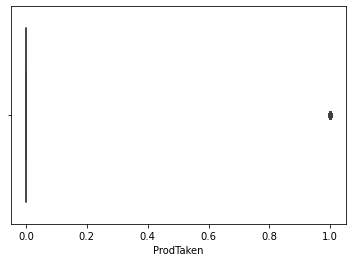

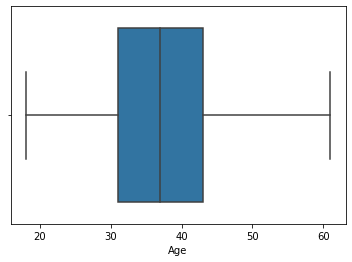

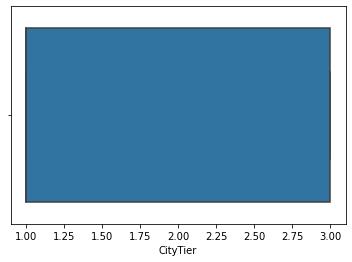

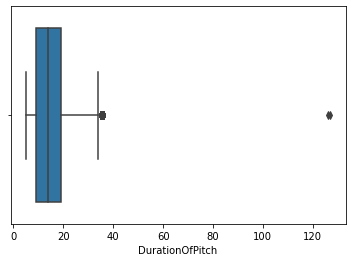

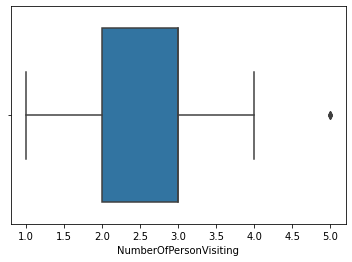

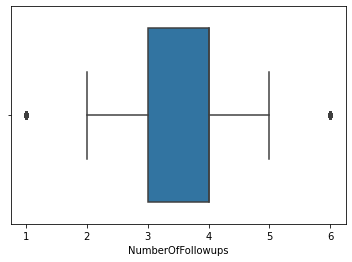

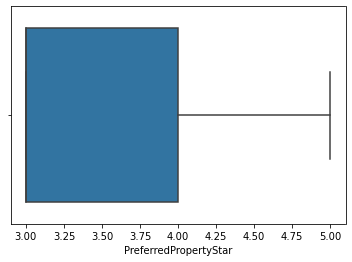

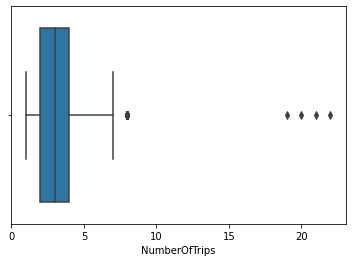

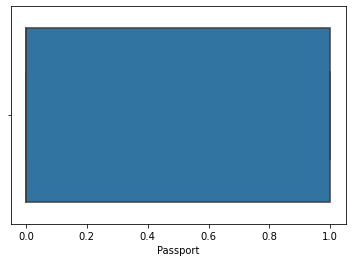

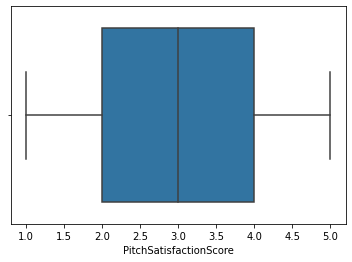

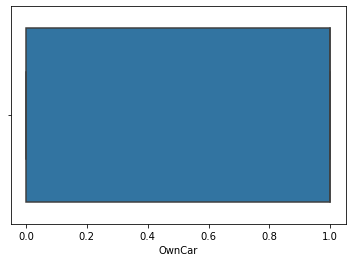

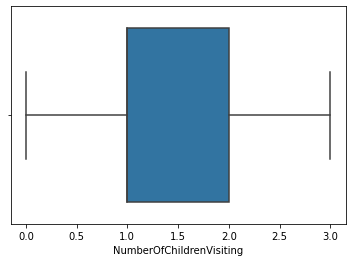

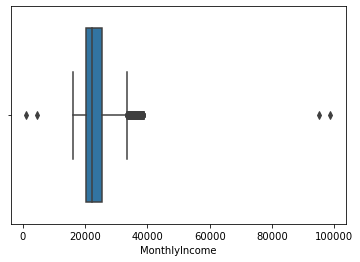

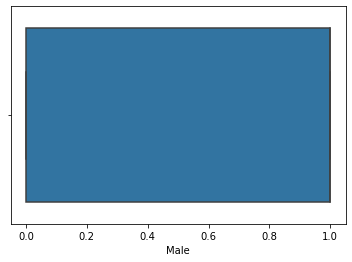

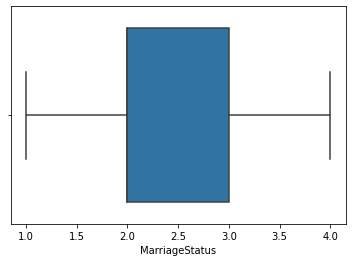

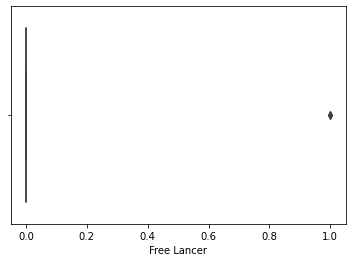

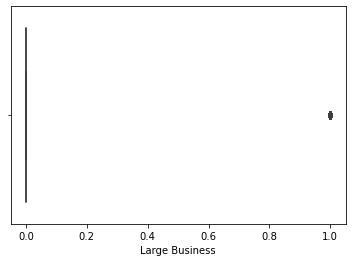

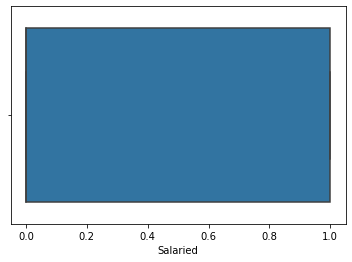

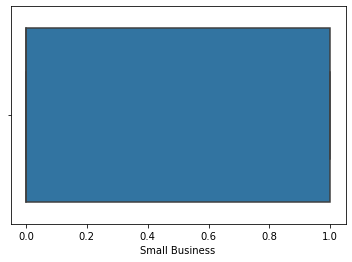

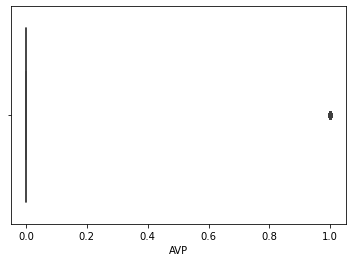

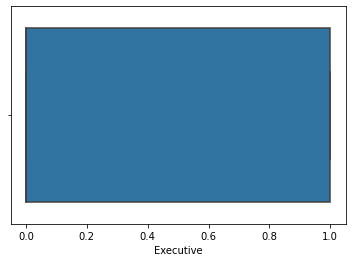

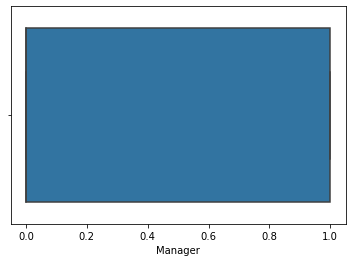

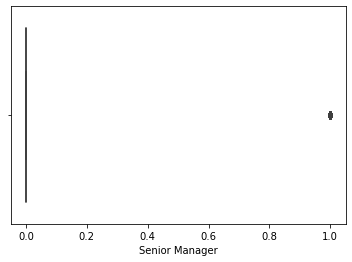

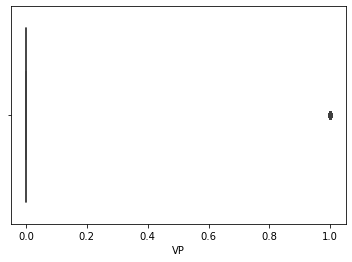

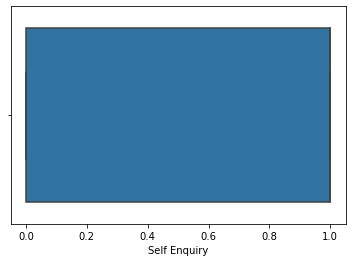

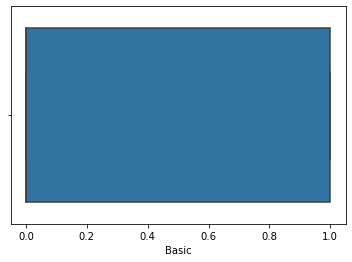

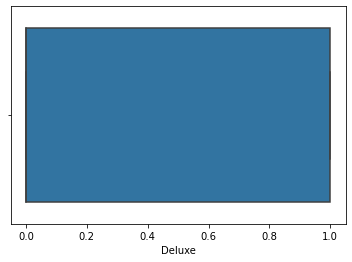

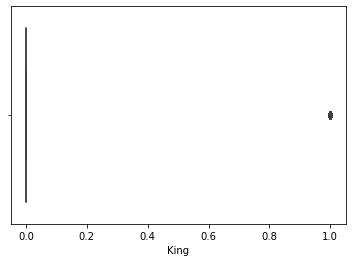

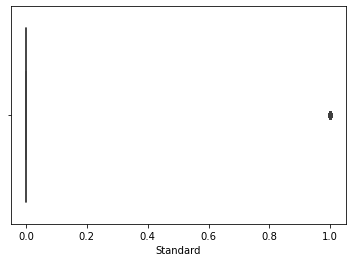

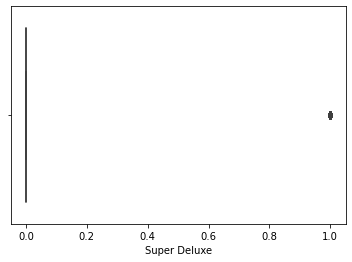

In [76]:
outliers_removal_list = ['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome', 'Male', 'MarriageStatus',
       'Free Lancer', 'Large Business', 'Salaried', 'Small Business', 'AVP',
       'Executive', 'Manager', 'Senior Manager', 'VP', 'Self Enquiry', 'Basic',
       'Deluxe', 'King', 'Standard', 'Super Deluxe']
for i in outliers_removal_list:
    sns.boxplot(df[i])
    plt.show()

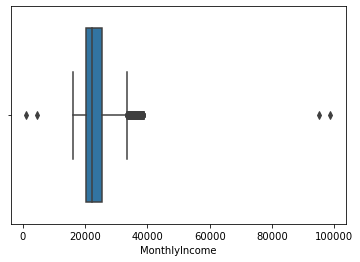

In [78]:
incomeoutliersDF = df['MonthlyIncome']
incomeoutliers = sns.boxplot(df['MonthlyIncome'])


In [79]:
q1 = incomeoutliersDF.quantile(0.25)
q3 = incomeoutliersDF.quantile(0.75)
iqr = q3-q1
print(iqr,q1,q3)

5255.0 20234.0 25489.0


In [80]:
min_q = q1 - 1.5*iqr
max_q = q3 + 1.5*iqr
print(min_q,max_q)

12351.5 33371.5


In [81]:
monthlyIncomeFiltd = df['MonthlyIncome'][(df['MonthlyIncome']>min_q) & (df['MonthlyIncome']<max_q)]

In [82]:
newdf = df[(df['MonthlyIncome']>min_q) & (df['MonthlyIncome']<max_q)]

In [94]:
### removing outliers from no of trips

In [99]:
df['NumberOfTrips']

0       1.0
1       2.0
2       7.0
3       2.0
4       1.0
       ... 
4883    2.0
4884    3.0
4885    7.0
4886    3.0
4887    3.0
Name: NumberOfTrips, Length: 4818, dtype: float64

In [82]:
q1 = incomeoutliersDF.quantile(0.25)
q3 = incomeoutliersDF.quantile(0.75)
iqr = q3-q1
print(iqr,q1,q3)

In [82]:
min_q = q1 - 1.5*iqr
max_q = q3 + 1.5*iqr
print(min_q,max_q)

In [83]:
#this is the new dataframe that has outliers for monthly income removed
newdf

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,...,Executive,Manager,Senior Manager,VP,Self Enquiry,Basic,Deluxe,King,Standard,Super Deluxe
0,1,41.000000,3,6.0,3,3.0,3.0,1.0,1,2,...,0,1,0,0,1,0,1,0,0,0
1,0,49.000000,1,14.0,3,4.0,4.0,2.0,0,3,...,0,1,0,0,0,0,1,0,0,0
2,1,37.000000,1,8.0,3,4.0,3.0,7.0,1,3,...,1,0,0,0,1,1,0,0,0,0
3,0,33.000000,1,9.0,2,3.0,3.0,2.0,1,5,...,1,0,0,0,0,1,0,0,0,0
4,0,37.319986,1,8.0,2,3.0,4.0,1.0,0,5,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.000000,3,9.0,3,5.0,4.0,2.0,1,1,...,0,1,0,0,1,0,1,0,0,0
4884,1,28.000000,1,31.0,4,5.0,3.0,3.0,1,3,...,1,0,0,0,0,1,0,0,0,0
4885,1,52.000000,3,17.0,4,4.0,4.0,7.0,0,1,...,0,0,1,0,1,0,0,0,1,0
4886,1,19.000000,3,16.0,3,4.0,3.0,3.0,0,5,...,1,0,0,0,1,1,0,0,0,0


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [85]:
x = newdf[['Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome', 'Male', 'MarriageStatus',
       'Free Lancer', 'Large Business', 'Salaried', 'Small Business', 'AVP',
       'Executive', 'Manager', 'Senior Manager', 'VP', 'Self Enquiry', 'Basic',
       'Deluxe', 'King', 'Standard', 'Super Deluxe']]
y = newdf['ProdTaken']

In [86]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25, random_state=101)

In [87]:
modeldt1 = DecisionTreeClassifier().fit(xtrain, ytrain)
modeldt1.score(xtest, ytest)

0.9097408400357462

In [88]:
modelrf1 = RandomForestClassifier().fit(xtrain, ytrain)
modelrf1.score(xtest, ytest)

0.9240393208221627

#### <b>Testing the best number of estimators

In [91]:
score_rf_dict = {}
for i in range(10,100):
    modelrf1 = RandomForestClassifier(n_estimators=i).fit(xtrain, ytrain)
    score_rf_dict[i] = modelrf1.score(xtest, ytest)
    

In [93]:
modelrf1 = RandomForestClassifier(n_estimators=71).fit(xtrain, ytrain)
modelrf1.score(xtest, ytest)

0.9320822162645219